In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

earthquakes_Data = pd.read_csv("all_month.csv")

Earthquake Data at a glance

In [3]:
earthquakes_Data.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-10-18T08:21:36.920Z,35.652500,-117.534000,9.76,0.66,ml,8.0,149.0,0.170900,0.19,...,2022-10-18T08:25:05.857Z,"13km ENE of Ridgecrest, CA",earthquake,0.68,3.59,0.09200,4.0,automatic,ci,ci
1,2022-10-18T08:00:38.550Z,17.956500,-66.953667,12.84,2.31,md,3.0,204.0,0.073190,0.04,...,2022-10-18T08:10:27.700Z,"5 km WSW of Guánica, Puerto Rico",earthquake,2.26,0.91,0.03772,2.0,reviewed,pr,pr
2,2022-10-18T07:52:32.640Z,38.821999,-122.802002,2.59,0.74,md,13.0,88.0,0.006458,0.01,...,2022-10-18T08:15:16.354Z,"6km NW of The Geysers, CA",earthquake,0.31,0.94,0.10000,2.0,automatic,nc,nc


In [4]:
earthquakes_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10387 entries, 0 to 10386
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10387 non-null  object 
 1   latitude         10387 non-null  float64
 2   longitude        10387 non-null  float64
 3   depth            10387 non-null  float64
 4   mag              10385 non-null  float64
 5   magType          10385 non-null  object 
 6   nst              8905 non-null   float64
 7   gap              8905 non-null   float64
 8   dmin             6880 non-null   float64
 9   rms              10387 non-null  float64
 10  net              10387 non-null  object 
 11  id               10387 non-null  object 
 12  updated          10387 non-null  object 
 13  place            10387 non-null  object 
 14  type             10387 non-null  object 
 15  horizontalError  7816 non-null   float64
 16  depthError       10386 non-null  float64
 17  magError    

In [5]:
earthquakes_Data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10387.000000,10387.000000,10387.000000,10385.000000,8905.000000,8905.000000,6880.000000,10387.000000,7816.000000,10386.000000,8597.000000,8898.000000
mean,37.421661,-111.157095,19.287483,1.577675,24.023919,118.248623,0.912274,0.256118,1.730954,2.348139,0.295548,15.018656
std,18.556453,62.075907,47.829783,1.293931,21.931932,62.816857,2.953273,0.261815,3.122657,8.766451,0.572432,27.978485
min,-62.969400,-179.937300,-3.740000,-1.170000,0.000000,11.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,33.215917,-150.450150,3.130000,0.730000,10.000000,71.000000,0.027067,0.100000,0.280000,0.470000,0.107861,4.000000
50%,38.180900,-120.196333,7.600000,1.300000,17.000000,102.000000,0.063330,0.150000,0.470000,0.780000,0.169000,7.000000
75%,46.755750,-110.809417,13.710000,2.010000,31.000000,155.010000,0.144725,0.310000,0.910000,1.540000,0.251000,16.000000
max,82.475900,179.975200,638.038000,7.600000,269.000000,352.000000,36.085000,4.130000,17.960000,431.600000,5.520000,645.000000


In [6]:
earthquakes_Data.shape

(10387, 22)

Vizualising the information

Text(0.5, 1.0, 'Magnitude compared to lat, long and depth')

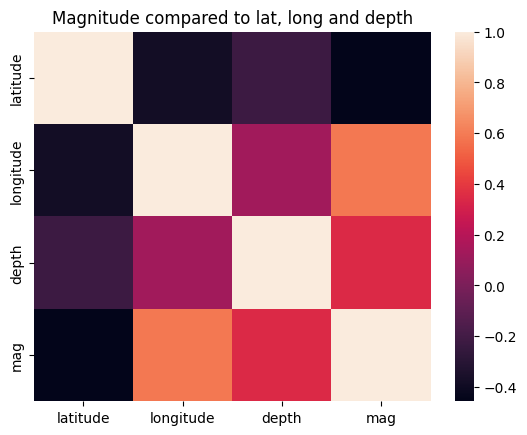

In [7]:
#Looking for correlations
sns.heatmap(earthquakes_Data[["latitude", "longitude", "depth", "mag"]].corr())
plt.title("Magnitude compared to lat, long and depth")

Text(0.5, 1.0, 'Magnitude compared to longitude')

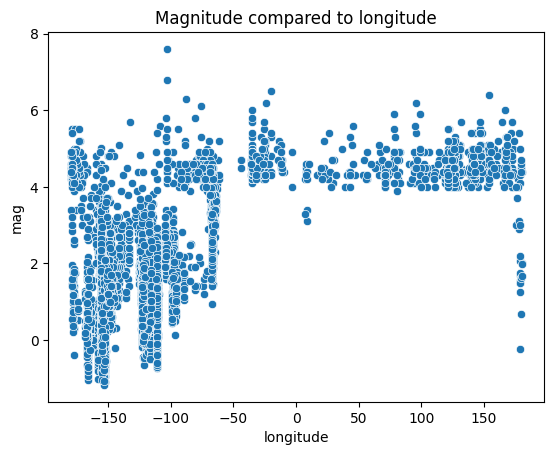

In [8]:
#Scatter plots of the data with the highest correlations, results are less imforative than expected
sns.scatterplot(earthquakes_Data, x = "longitude", y = "mag")
plt.title("Magnitude compared to longitude")

<AxesSubplot: xlabel='depth', ylabel='mag'>

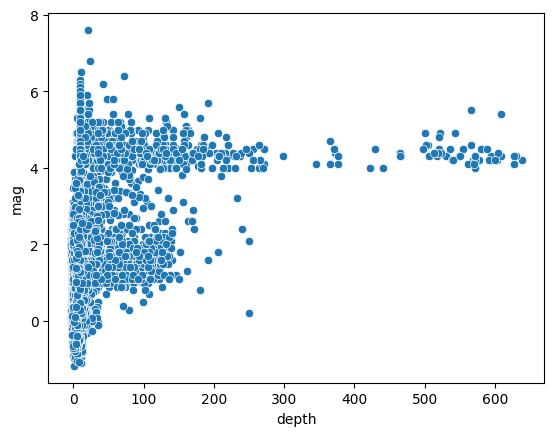

In [9]:
sns.scatterplot(earthquakes_Data, x = "depth", y = "mag")

Text(0.5, 1.0, 'Boxplot of earthquakes magnitude')

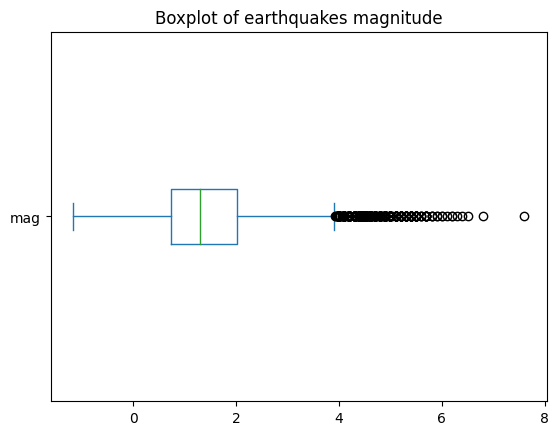

In [10]:
#Different visualizations of magnitude
box = earthquakes_Data["mag"].plot(kind = "box", vert = False)
plt.title("Boxplot of earthquakes magnitude")

(-2.0, 8.0)

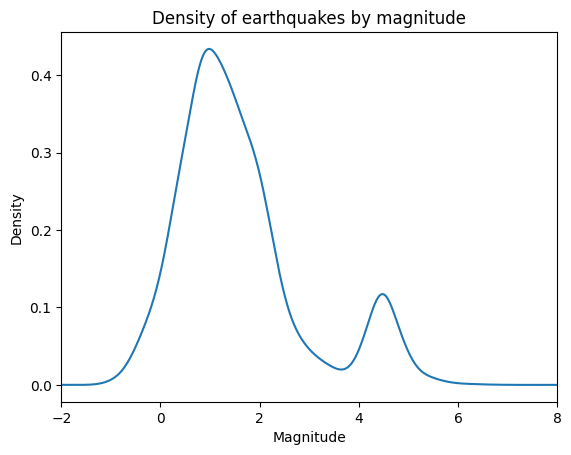

In [11]:
density = earthquakes_Data["mag"].plot(kind = "density")
plt.title("Density of earthquakes by magnitude")
plt.xlabel("Magnitude")
plt.xlim(-2, 8)

Text(0.5, 0, 'Magnitude')

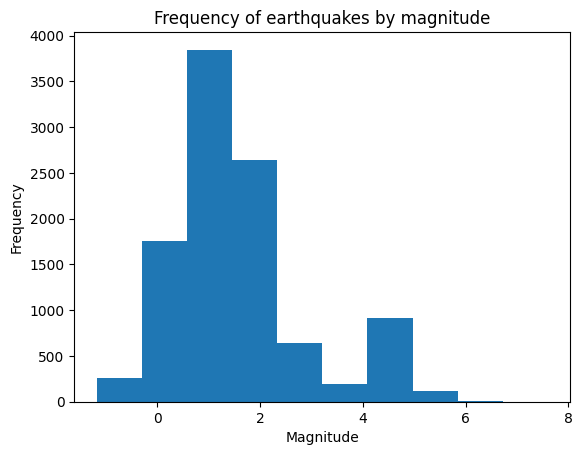

In [12]:
frequency = earthquakes_Data["mag"].plot(kind = "hist")
plt.title("Frequency of earthquakes by magnitude")
plt.xlabel("Magnitude")

In [13]:
earthquakes_Data["locationSource"].value_counts()

nc    1669
ak    1482
ci    1477
us    1173
hv    1125
uu     858
nn     638
av     614
ok     454
pr     355
uw     334
tx     177
nm      23
se       8
Name: locationSource, dtype: int64

Text(0.5, 1.0, 'Magnitude values by location')

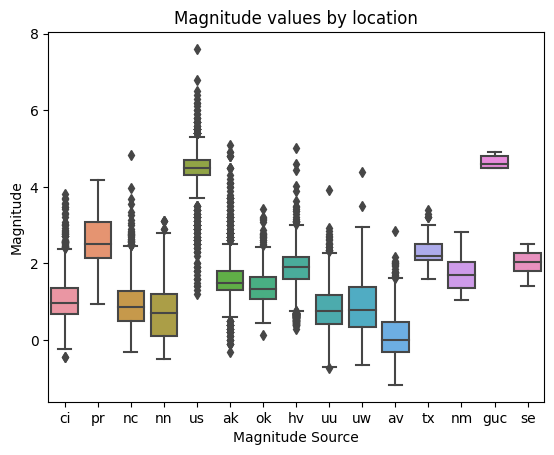

In [14]:
sns.boxplot(earthquakes_Data, y = "mag", x = "magSource")
plt.ylabel("Magnitude")
plt.xlabel("Magnitude Source")
plt.title("Magnitude values by location")

<AxesSubplot: ylabel='refinedPlace'>

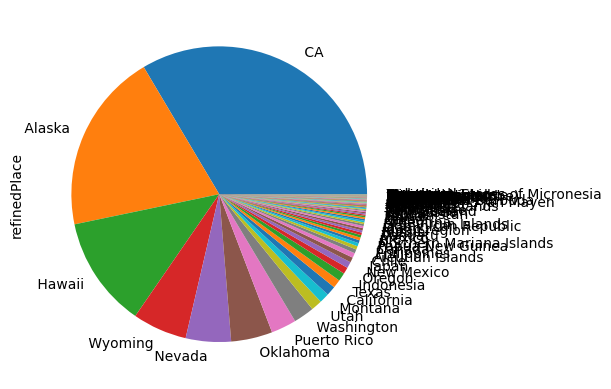

In [15]:
#Extracting Place
earthquakes_Data["refinedPlace"] = earthquakes_Data["place"].str.split(",").str.get(1)
#Plotting it as a pie chart although the high number of locations leads to poor visual clarity
earthquakes_Data["refinedPlace"].value_counts().plot(kind = "pie")

In [16]:
earthquakes_Data["type"].value_counts()

earthquake            10210
quarry blast            110
explosion                65
chemical explosion        1
ice quake                 1
Name: type, dtype: int64